# Fall 2023 Inside-class Competition Template
#### Arin Ghazarian


#####  Improve the macro F-score by applying feature engineering, feature selection, using different ML models and etc. You will need to at least do three additional steps and be able to improve the performance by applying these in order to get the 5 points for this assignment.

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import f1_score
import seaborn as sns


In [12]:
np.random.seed(1000)

## Loading the Data

In [13]:
train_df = pd.read_csv('C:/Users/030740227/Downloads/cecs550-fall2023/Train.csv')
# train_df.drop(columns=["Gender",'QOnset'], axis=1,inplace=True)
train_df.head()


,patient_ID,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,8645,7,61,0,58,58,86,432,424,54,27,10,219,262,435
1,305,1,58,1,87,94,128,382,459,74,-74,14,215,279,406
2,2420,0,91,1,121,375,78,424,602,78,67,20,222,261,434
3,1877,7,68,1,53,53,84,462,433,26,35,9,218,260,449
4,1860,8,49,1,63,63,72,384,392,26,18,10,218,254,410


In [15]:
train_df.corr()

,patient_ID,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
patient_ID,1.000000,0.077433,-0.012053,0.017440,0.273580,0.093931,0.026942,-0.208454,0.085415,0.032121,0.027390,0.273908,-0.005903,0.023804,-0.207984
Rhythm,0.077433,1.000000,-0.350082,0.054436,-0.009079,-0.309464,-0.091931,0.000536,-0.110018,0.026295,-0.043783,-0.005815,0.012477,-0.087179,0.003231
PatientAge,-0.012053,-0.350082,1.000000,-0.062316,0.025086,0.122064,0.096789,0.104135,0.235585,-0.237850,0.103290,0.023417,0.015720,0.114200,0.106663
Gender,0.017440,0.054436,-0.062316,1.000000,0.091202,0.033327,-0.266545,-0.044787,0.125761,0.063438,-0.013339,0.092422,0.169485,-0.149217,-0.007744
VentricularRate,0.273580,-0.009079,0.025086,0.091202,1.000000,0.525539,-0.051550,-0.850729,0.424215,0.105590,0.124777,0.996994,-0.006156,-0.059101,-0.844928
AtrialRate,0.093931,-0.309464,0.122064,0.033327,0.525539,1.000000,-0.065181,-0.465770,0.248918,0.055707,0.069549,0.522301,0.035151,-0.041379,-0.454260
QRSDuration,0.026942,-0.091931,0.096789,-0.266545,-0.051550,-0.065181,1.000000,0.194485,0.193111,-0.066166,0.005136,-0.051715,-0.435983,0.715075,0.098531
QTInterval,-0.208454,0.000536,0.104135,-0.044787,-0.850729,-0.465770,0.194485,1.000000,0.027568,-0.130855,-0.073264,-0.847943,-0.070171,0.150429,0.976434
QTCorrected,0.085415,-0.110018,0.235585,0.125761,0.424215,0.248918,0.193111,0.027568,1.000000,-0.042115,0.076786,0.423358,-0.140057,0.094696,-0.002964
RAxis,0.032121,0.026295,-0.237850,0.063438,0.105590,0.055707,-0.066166,-0.130855,-0.042115,1.000000,0.064252,0.105298,0.043378,-0.036027,-0.120373


<AxesSubplot:>

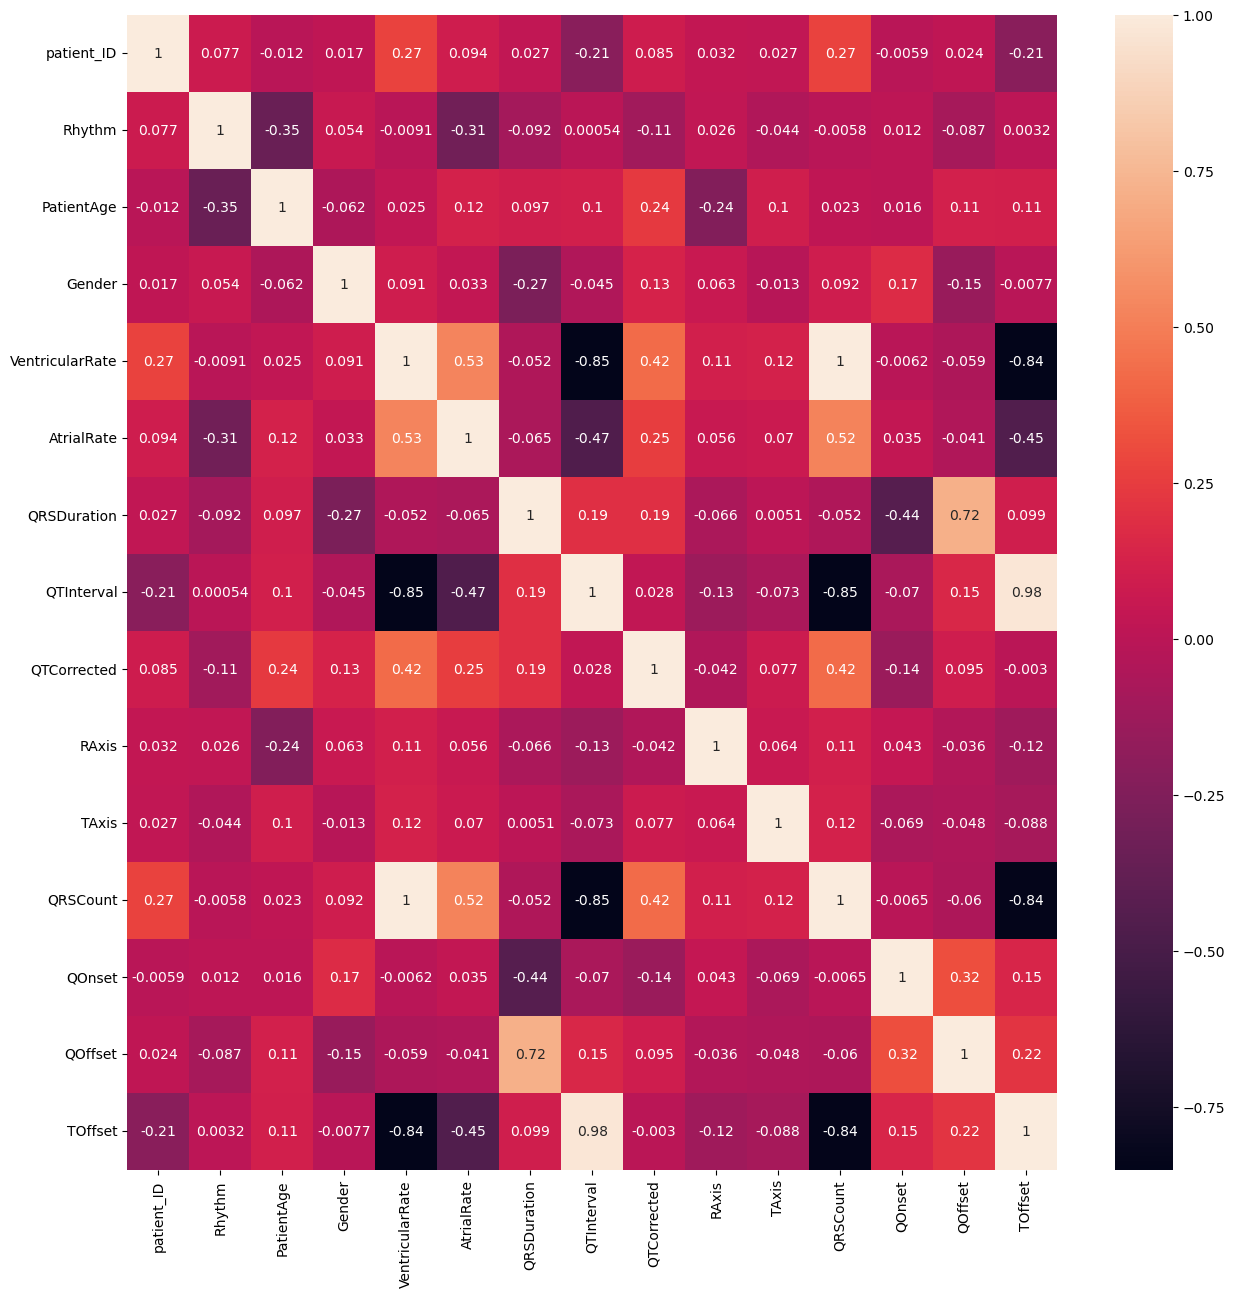

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train_df.corr(),annot=True)

<AxesSubplot:xlabel='Rhythm', ylabel='Count'>

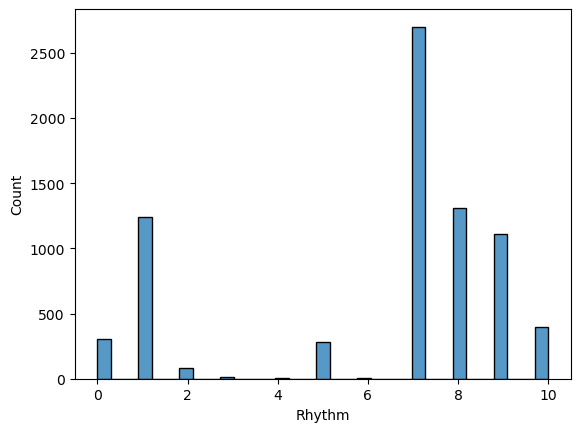

In [17]:
sns.histplot(data=train_df,x='Rhythm')

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7452 entries, 0 to 7451
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   patient_ID       7452 non-null   int64
 1   Rhythm           7452 non-null   int64
 2   PatientAge       7452 non-null   int64
 3   Gender           7452 non-null   int64
 4   VentricularRate  7452 non-null   int64
 5   AtrialRate       7452 non-null   int64
 6   QRSDuration      7452 non-null   int64
 7   QTInterval       7452 non-null   int64
 8   QTCorrected      7452 non-null   int64
 9   RAxis            7452 non-null   int64
 10  TAxis            7452 non-null   int64
 11  QRSCount         7452 non-null   int64
 12  QOnset           7452 non-null   int64
 13  QOffset          7452 non-null   int64
 14  TOffset          7452 non-null   int64
dtypes: int64(15)
memory usage: 873.4 KB


In [19]:
train_df = train_df.dropna()

In [20]:
train_df = train_df.drop_duplicates()

In [21]:
train_df.describe()

,patient_ID,Rhythm,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
count,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000,7452.000000
mean,5299.113929,6.205448,59.288245,0.444176,84.004026,92.620773,90.841385,384.531133,434.409554,39.771605,45.289318,13.812534,219.212560,264.633253,411.478127
std,3069.073231,3.016495,17.905158,0.496907,34.227471,60.444393,17.516940,59.184406,39.513319,41.660304,58.065932,5.638760,6.456334,8.311887,29.842411
min,2.000000,0.000000,4.000000,0.000000,34.000000,0.000000,18.000000,148.000000,224.000000,-89.000000,-89.000000,5.000000,159.000000,249.000000,300.000000
25%,2633.750000,5.000000,49.000000,0.000000,57.000000,57.000000,80.000000,344.000000,408.000000,15.000000,19.000000,9.000000,216.000000,259.000000,392.000000
50%,5275.000000,7.000000,61.000000,0.000000,73.000000,72.000000,88.000000,390.000000,431.000000,47.000000,42.000000,12.000000,219.000000,263.000000,414.000000
75%,7973.250000,8.000000,72.000000,1.000000,104.000000,106.000000,98.000000,426.000000,456.000000,68.000000,62.000000,17.000000,224.000000,268.000000,432.000000
max,10645.000000,10.000000,97.000000,1.000000,263.000000,535.000000,256.000000,736.000000,760.000000,270.000000,270.000000,40.000000,240.000000,331.000000,582.000000


In [22]:
for i in train_df.columns:

    print(f'{i}:\n {train_df[i].unique()}')
    print(train_df[i].unique().shape)

patient_ID:
 [8645  305 2420 ... 8039 6936 5640]
(7452,)
Rhythm:
 [ 7  1  0  8  9  5 10  2  4  3  6]
(11,)
PatientAge:
 [61 58 91 68 49 64 51 32 46 84 39 59 56 74 69 14 67 78 54 63 71 28 41 18
 45 72 65 79 50 30 48 55 42 37 53 52 60 82 47 62 75 88 27 80 76 83 44 66
 85 70 19 38 90 87 35 34 73 33 29 57 43 86 25 13 77  5 81 23 40 36 93 12
  9  8 16 20 94 31 26 21  6 11 92 89  7 22 17 15 24 10  4 96 95 97]
(94,)
Gender:
 [0 1]
(2,)
VentricularRate:
 [ 58  87 121  53  63  55  64 114  70 102 129  52 107 109  72  57  82 130
  77  91  39  73 122  62  56 147 106  59  93  51  50  98  54 108 180 105
 171 138 148 115  43 182 126  95  75 111  89 174  61  79 103 132  85 113
 119 101  66  74  69 191 100  84  42  45  78 142 118 104  47 175  81 117
  83  65 123 164 155  97  46  71  90 124  92 152 198  68  49 120 205 168
  48 181  67 125 128 188  80  96 189 112 263  76 193  99  86 136  60  88
 207  44 133 149 157 127 162 116 176 158 160 144 183 194 190 110 202 146
 170 139 131 140 153 173 161 169 166 1

In [23]:
train_data, test_data = train_test_split(train_df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [24]:
train_y=train_data['Rhythm']
train_data.drop(['Rhythm'], axis=1,inplace=True)

### Training the Model

In [25]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
from sklearn import metrics
from xgboost import XGBClassifier
clf = XGBClassifier(random_state=42)
# clf = RandomForestClassifier(random_state=42).fit(train_data, train_y)
clf.fit(train_data, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
test_y=test_data['Rhythm']
test_data.drop(['Rhythm'], axis=1,inplace=True)
y_pred=clf.predict(test_data)

In [27]:
f1_score(test_y, y_pred, average='macro')


0.5607238036790377

In [28]:
f1_score(test_y, y_pred, average=None)

array([0.29787234, 0.80377358, 0.84210526, 0.        , 0.        ,
       0.47619048, 0.        , 0.98073218, 0.9009009 , 0.91097308,
       0.95541401])

In [29]:
f1_score(test_y, y_pred, average='micro')

0.8832997987927567

In [30]:
from sklearn.metrics import classification_report


class_report = classification_report(test_y, y_pred)
print(f'Classification Report:\n{class_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.22      0.30        63
           1       0.81      0.80      0.80       267
           2       0.94      0.76      0.84        21
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.74      0.35      0.48        57
           6       0.00      0.00      0.00         1
           7       0.97      1.00      0.98       511
           8       0.86      0.95      0.90       263
           9       0.87      0.95      0.91       231
          10       0.91      1.00      0.96        75

    accuracy                           0.88      1491
   macro avg       0.60      0.55      0.56      1491
weighted avg       0.87      0.88      0.87      1491



c:\Users\030740227\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\030740227\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\030740227\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Preparing Submission File

In [31]:
test_submission_df = pd.read_csv("C:/Users/030740227/Downloads/cecs550-fall2023/Test.csv")
test_submission_df.head()
# test_submission_df.drop(columns=['Gender','QOnset'], axis=1,inplace=True)

,patient_ID,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset
0,6332,61,0,58,58,82,422,414,80,50,9,221,262,432
1,7727,5,0,93,93,64,332,412,66,46,15,231,263,397
2,9062,72,1,112,112,78,346,472,16,47,18,221,260,394
3,6131,38,0,90,90,84,344,420,85,62,15,220,262,392
4,3081,71,1,87,87,78,370,445,75,61,14,224,263,409


In [32]:
y_pred_submission=clf.predict(test_submission_df)

In [33]:
# y_pred = clf.predict(test_df)
test_submission_df[['Rhythm']] = pd.DataFrame(y_pred_submission)

In [34]:
test_submission_df.head()

,patient_ID,PatientAge,Gender,VentricularRate,AtrialRate,QRSDuration,QTInterval,QTCorrected,RAxis,TAxis,QRSCount,QOnset,QOffset,TOffset,Rhythm
0,6332,61,0,58,58,82,422,414,80,50,9,221,262,432,7
1,7727,5,0,93,93,64,332,412,66,46,15,231,263,397,8
2,9062,72,1,112,112,78,346,472,16,47,18,221,260,394,9
3,6131,38,0,90,90,84,344,420,85,62,15,220,262,392,8
4,3081,71,1,87,87,78,370,445,75,61,14,224,263,409,8


In [35]:
test_submission_df.shape

(3194, 15)

In [36]:
test_submission_df[['patient_ID','Rhythm']].head()

,patient_ID,Rhythm
0,6332,7
1,7727,8
2,9062,9
3,6131,8
4,3081,8


In [37]:
test_submission_df[['patient_ID','Rhythm']].to_csv('C:/Users/030740227/Downloads/cecs550-fall2023/submission-sample-file_1.csv',index=False)


# Extracted target variable 'Rhythm', dropped it from features in both training and testing data.
# Chose XGBoost classifier and trained it on the training data.
# Generated predictions using the trained XGBoost model on the testing data.
# Calculated macro F1-score and individual class F1-scores for model evaluation.
# Produced a detailed classification report, including precision, recall, and F1-score for each class.

# team name = Balu1999